
<font size = "5"> **Day 1: [Atomic Resolution STEM and Machine Learning](../MLSTEM2024.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />

[Download](https://raw.githubusercontent.com/gduscher/MLSTEM2024//main/Day1/4_Atoms_Finding.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MLSTEM2024/blob/main/Day1/4_Atoms_Finding.ipynb)


# Simple Atom Position Detection 

part of the workshop of 

<font size = "5"> **[Machine Learning in Transmission Electron Microscopy](../_MLSTEM.ipynb)**</font>


**Day1: Atomic Resolution STEM, Deep Convolutional Neural Networks, and Variational Auto Encoder**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Sergei Kalinin</td>
  </tr>
  <tr>
    <td colspan="2"><center>Microscopy Facilities</td> 
  </tr>
  
  <tr>
    <td colspan="2"><center>Materials Science & Engineering</td>
    <td></td>
  </tr>
  <tr>
    <td colspan="2"><center>Institute of Advanced Materials & Manufacturing</td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>
        
**June 2024**



## Import packages for figures and 
First we load the code to make figures from pyTEMlib
### Check Installed Packages

In [ ]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

if test_package('pyTEMlib') < '0.2024.4.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
print('done')

installing pyTEMlib


### Load the plotting and figure packages

In [1]:
%matplotlib widget

import matplotlib.pylab as plt
import numpy as np
import sys
if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '../../pyTEMlib')
import pyTEMlib.file_tools      # File input/ output library
import pyTEMlib.image_tools 
import pyTEMlib.probe_tools
import pyTEMlib.atom_tools

# For archiving reasons it is a good idea to print the version numbers out at this point
print('pyTEM version: ', pyTEMlib.__version__)

## Do all of registration

notebook_tags= {'notebook': 'Image_Registration',
                'notebook_version': '2024_05_14',
                'pyTEM version': pyTEMlib.__version__}


You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
pyTEM version:  0.2024.05.0


## Load an image stack :

Please, load an image stack. <br>

A stack of images is used to reduce noise, but for an added image the images have to be aligned to compensate for drift and other microscope instabilities.

In [2]:
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
fileWidget = pyTEMlib.file_tools.FileWidget()

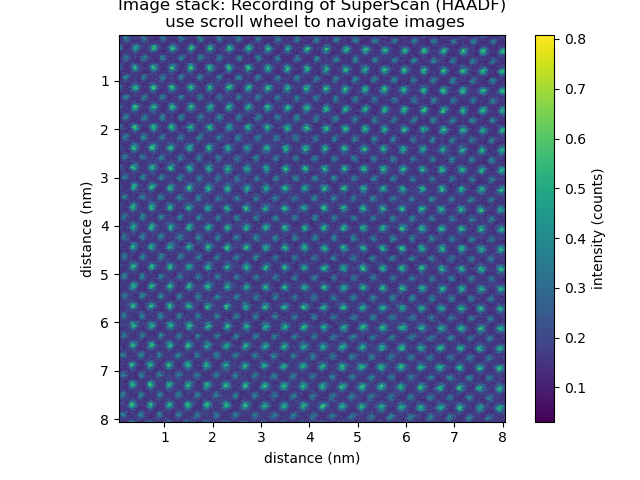

In [8]:
datasets = fileWidget.datasets
dataset = fileWidget.selected_dataset
# dataset = datasets['Channel_000']
if dataset.data_type.name != 'IMAGE_STACK':
    print('We really would need an image stack')

view = dataset.plot()
# dataset

## Complete Registration 

Takes a while, depending on your computer between 1 and 10 minutes

### Rigid Registration

Using sub-pixel accuracy registration determination method of:

Manuel Guizar-Sicairos, Samuel T. Thurman, and James R. Fienup, “Efficient subpixel image registration algorithms,” Optics Letters 33, 156-158 (2008). [DOI:10.1364/OL.33.000156](https://www.doi.org/%2010.1364/OL.33.000156)

as implemented in ``phase_cross_correlation`` function by ``scikit-image`` in the [registration](https://scikit-image.org/docs/dev/api/skimage.registration.html) package. 



Stack contains  25  images, each with 512  pixels in x-direction and  512  pixels in y-direction


  0%|          | 0/25 [00:00<?, ?it/s]

[[0.0, 0.0], array([0., 0.]), array([ 0.102, -0.206]), array([-0.642,  0.127]), array([ 0.207, -0.211]), array([-1.41 , -0.093]), array([-0.695,  0.165]), array([-0.068, -0.088]), array([1.33 , 0.812]), array([0.2  , 0.984]), array([-0.251, -0.477]), array([-0.995, -0.804]), array([-0.141,  0.134]), array([0.269, 0.708]), array([-0.301,  0.265]), array([ 0.249, -0.605]), array([-0.38 ,  0.488]), array([0.185, 0.546]), array([-0.679,  0.657]), array([-0.195,  0.758]), array([0.247, 0.2  ]), array([-0.541, -0.059]), array([ 0.085, -1.934]), array([-0.856,  0.139]), array([-0.148, -0.335]), array([ 0.088, -0.1  ])]


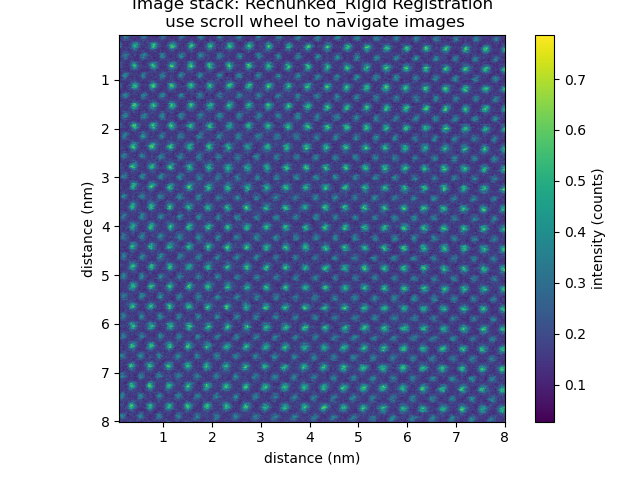

In [12]:
rigid_registered_dataset = pyTEMlib.image_tools.rigid_registration(dataset, sub_pixel=True)
view = rigid_registered_dataset.plot()
    

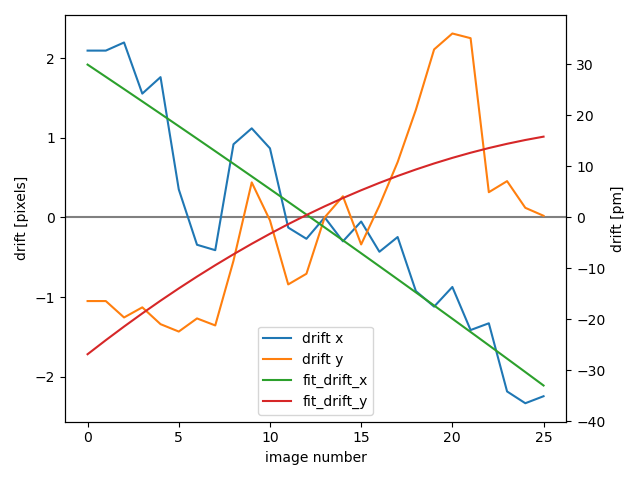

In [13]:
drift = rigid_registered_dataset.metadata['drift']
polynom_degree = 2 # 1 is linear fit, 2 is parabolic fit, ...

x = np.linspace(0,drift.shape[0]-1,drift.shape[0])

line_fit_x = np.polyfit(x, drift[:,0], polynom_degree)
poly_x = np.poly1d(line_fit_x)
line_fit_y = np.polyfit(x, drift[:,1], polynom_degree)
poly_y = np.poly1d(line_fit_y)

plt.figure()
plt.axhline(color = 'gray')
plt.plot(x, drift[:,0], label = 'drift x')
plt.plot(x, drift[:,1], label = 'drift y')
plt.plot(x, poly_x(x),  label = 'fit_drift_x')
plt.plot(x, poly_y(x),  label = 'fit_drift_y')

plt.legend();
ax_pixels = plt.gca()
ax_pixels.step(1, 1)

scaleX = (rigid_registered_dataset.x[1]-rigid_registered_dataset.x[0])*1000.  #in pm

ax_pm = ax_pixels.twinx()
x_1, x_2 = ax_pixels.get_ylim()

ax_pm.set_ylim(x_1*scaleX, x_2*scaleX)

ax_pixels.set_ylabel('drift [pixels]')
ax_pm.set_ylabel('drift [pm]')
ax_pixels.set_xlabel('image number');
plt.tight_layout()


### Non-Rigid Registration

Here we use the **Diffeomorphic Demon Non-Rigid Registration** as provided by **simpleITK**.  

Please Cite: 
* [simpleITK](http://www.simpleitk.org/SimpleITK/project/parti.html)
    
    and
    
* [T. Vercauteren, X. Pennec, A. Perchant and N. Ayache *Diffeomorphic Demons Using ITK\'s Finite Difference Solver Hierarchy* The Insight Journal, 2007](http://hdl.handle.net/1926/510)

In [14]:
non_rigid_registered = pyTEMlib.image_tools.demon_registration(rigid_registered_dataset)

  0%|          | 0/25 [00:00<?, ?it/s]

:-)
You have successfully completed Diffeomorphic Demons Registration


In [30]:
view= non_rigid_registered.plot()

datasets['Log_000'] = non_rigid_registered

## Find Atom Positions
### Lucy -Richardson Deconvolution

Lucy - Richardson Deconvolution removes noise and convolutes the intensity back into the atom (columns).

Here we use a slightly modified Lucy - Richardson Deconvolution which stops when converged.

Ideally the atom_size should be as large as the atoms in the image.

A good Lucy-Richardson Deconvolution should result in an image with atoms of a radius of about 2 pixels.

The number of steps to convergence should be less than 300 for a good approximation of atom_size.
> we use the non-rigid registered datset


Deconvolution of  Recording of SuperScan (HAADF)


  0%|          | 0/500 [00:00<?, ?it/s]

terminate
converged in 501 iterations

 Lucy-Richardson deconvolution converged in 501  iterations


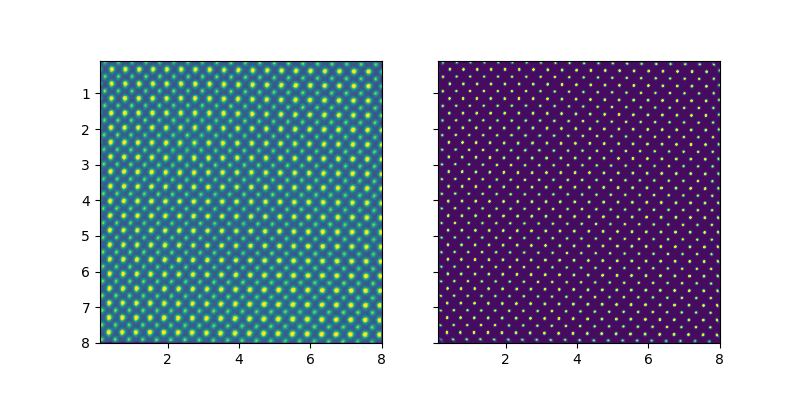

In [26]:
# ------- Input ------
atoms_size = 0.1 # in nm
# --------------------

image = non_rigid_registered.sum(axis=0)

out_tags = {}
image.metadata['experiment']= {'convergence_angle': 30, 'acceleration_voltage': 200000.}

scale_x = pyTEMlib.file_tools.get_slope(image.dim_0)
gauss_diameter = atoms_size/scale_x
gauss_probe = pyTEMlib.probe_tools.make_gauss(image.shape[0], image.shape[1], gauss_diameter)

print('Deconvolution of ', dataset.title)
LR_dataset = pyTEMlib.image_tools.decon_lr(image, gauss_probe, verbose=False)
datasets['Log_001'] = LR_dataset
extent = LR_dataset.get_extent([0,1])
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax[0].imshow(image.T, extent = extent,vmax=np.median(np.array(image))+3*np.std(np.array(image)))
ax[1].imshow(LR_dataset.T, extent = extent, vmax=np.median(np.array(LR_dataset))+3*np.std(np.array(LR_dataset)));

## Atom Detection

Choose threshold and atom size so that all atoms or at least all bright atoms of an unit cell are found 

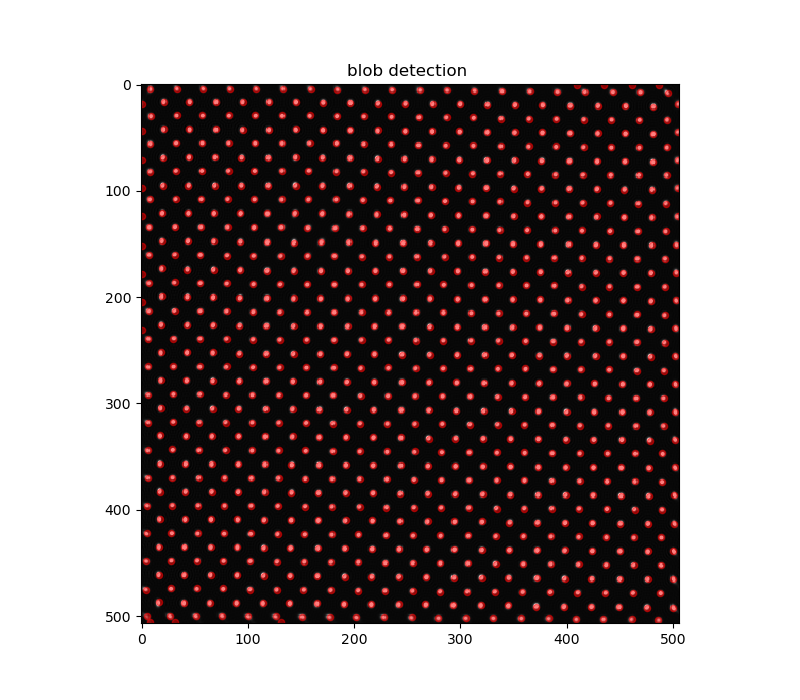

In [27]:
import skimage
# ------- Input ------
threshold = 0.9 #usally between 0.01 and 0.9  the smaller the more atoms
atom_size = .06 #in nm  
# ----------------------


image = LR_dataset
#image = image_choice.dataset
scale_x = pyTEMlib.file_tools.get_slope(image.dim_1)
blobs =  skimage.feature.blob_log(image, max_sigma=atom_size/scale_x, threshold=threshold)

fig1, ax = plt.subplots(1, 1,figsize=(8,7), sharex=True, sharey=True)
plt.title("blob detection ")

plt.imshow(image.T, interpolation='nearest',cmap='gray', vmax=np.median(np.array(image))+3*np.std(np.array(image)))
plt.scatter(blobs[:, 0], blobs[:, 1], c='r', s=20, alpha = .5);

In [33]:
image_choice = pyTEMlib.file_tools.ChooseDataset(datasets)  

Dropdown(description='select dataset:', options=('Channel_000: Recording of SuperScan (HAADF)', 'Log_001: Lucy…

sidpy.Dataset of type IMAGE_STACK with:
 dask.array<sub, shape=(506, 507), dtype=float64, chunksize=(506, 507), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
y:  distance (nm) of size (506,)
x:  distance (nm) of size (507,)
 with metadata: ['analysis', 'input_crop', 'input_shape', 'input_dataset']
using radius  3 pixels


  0%|          | 0/796 [00:00<?, ?it/s]

C:\Users\gduscher\Documents\Github\MLSTEM2024\Day1\../../pyTEMlib\pyTEMlib\probe_tools.py:13: RuntimeWarning: invalid value encountered in divide
  probe = g / g.sum() * intensity


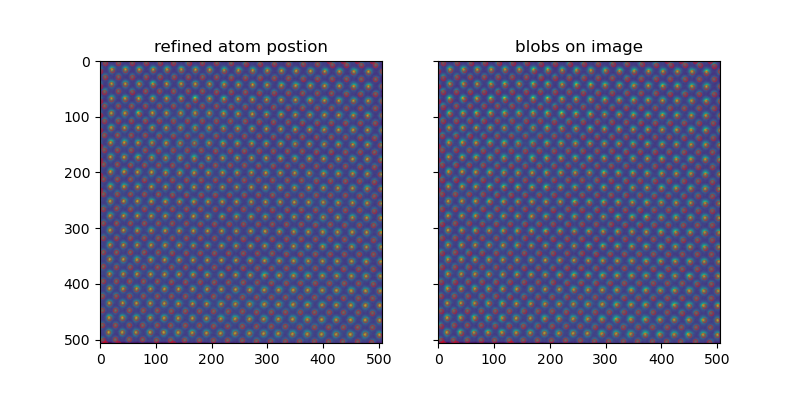

In [34]:
# ------- Input ------
atom_radius = 3  # in pixel
# ----------------------

if image_choice.dataset.data_type.name == 'IMAGE_STACK':
    image = image_choice.dataset.sum(axis=0)
else:
    image = image_choice.dataset

#atoms = atom_group['atoms'][()]
atoms = blobs
image = image-image.min()

#atom_radius = 2
MaxInt = 0
MinInt = 0 
maxDist = 2
sym = pyTEMlib.atom_tools.atom_refine(np.array(image), atoms, atom_radius, max_int = 0, min_int = 0, max_dist = 2)
refined_atoms = np.array(sym['atoms'])

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax[0].imshow(image.T)
ax[0].scatter(refined_atoms[:,0],refined_atoms[:,1],  s=10, alpha = 0.3, color = 'red')
ax[0].set_title('refined atom postion')
ax[1].imshow(image.T)
ax[1].scatter(atoms[:, 0], atoms[:, 1], c='r', s=10, alpha = .3);
ax[1].set_title('blobs on image');

In [36]:
file = pyTEMlib.file_tools.save_dataset(datasets)

C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_io.py:111: UserWarning: main_data_name should not contain the "-" character. Reformatted name from:Non-Rigid Registration to Non_Rigid Registration
  warn('main_data_name should not contain the "-" character. Reformatted'
C:\Users\gduscher\AppData\Local\anaconda3\Lib\site-packages\pyNSID\io\hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',


<HDF5 group "/Measurement_000" (3 members)>

## Appendix

### Demon Registration

Here we use the **Diffeomorphic Demon Non-Rigid Registration** as provided by **simpleITK**.  

Please Cite: 
* [simpleITK](http://www.simpleitk.org/SimpleITK/project/parti.html)
    
    and
    
* [T. Vercauteren, X. Pennec, A. Perchant and N. Ayache *Diffeomorphic Demons Using ITK\'s Finite Difference Solver Hierarchy* The Insight Journal, 2007](http://hdl.handle.net/1926/510)

This Non-Rigid Registration consists of the following steps:

- determine ``reference`` image
    - For this we use the average of the rigid registered stack
    - this averaged stack is then smeared with a Gaussian of sigma 2 pixel to reduce noise
    - under the assumption that high frequency scan distortions cancel out over several images, we, therefore, obtained the center of mass of the atoms. 

- perform the ``demon registration`` filter to determine a distortion matrix
    - each single image of a stack is first smeared with a Gaussian of sigma of 2pixels
    - then the deformation matrix is determined for these images
    - the deformation matrix is a matrix where each pixel has a vector ( x, and y value) for the relative shift of this pixel.
    
- This deformation matrix is used to ``transform`` the image
	- The transformation is performed on the original image.
	- Important, here, is to set the interpolator method, (the image needs to be interpolated because the new pixels are not on an integer grid.)
    
    
Let's see what the different interpolators do.

|Method	| RMS contrast |	Standard |	Mean |
|-------|:--------------|:-------------|:-------|
|original   |0.1965806	|0.07764114	|0.3949583
|Linear	    |0.20159315	|0.079470366	|0.39421165
|BSpline	|0.20162606	|0.0794831 	|0.39421043
|Gaussian	|0.14310582	|0.056414302 	|0.39421389
|Hamming	|0.20163293	|0.07948672 	|0.39421496

The Gaussian interpolator as the only one seems to smear the signal.

We will use the ``Bspline`` method a fast and simple method that does not introduce spurious features and does not smear the signal.


#### Full Code of Demon registration 